In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

In [2]:
# Especifica la ruta de tu archivo .txt
ruta_archivo = 'Colima02.txt'

# Utiliza pd.read_csv() para leer el archivo de texto
datos = pd.read_csv(ruta_archivo, sep=',', encoding='latin1')

#Muestra los primeros registros del DataFrame para verificar que se ha leído correctamente
datos = datos.drop('Unnamed: 5', axis=1)

# Divide la columna 'Fecha' en tres columnas: Dia, Mes y Año
datos[['Dia', 'Mes', 'Año']] = datos['Fecha'].str.split('/', expand=True)

# Convierte las nuevas columnas a tipo de datos numérico (entero)
datos['Dia'] = pd.to_numeric(datos['Dia'], errors='coerce').fillna(0).astype(int)
datos['Mes'] = pd.to_numeric(datos['Mes'], errors='coerce').fillna(0).astype(int)
datos['Año'] = pd.to_numeric(datos['Año'], errors='coerce').fillna(0).astype(int)

datos = datos.drop('Fecha', axis=1)

datos.replace('Nulo', np.nan, inplace=True)

# Eliminar filas que tienen valores no nulos
datos = datos.dropna()

# Crea un diccionario de mapeo de números de mes a nombres de mes
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Reemplaza los valores en la columna 'Mes' con los nombres de los meses
datos['Mes'] = datos['Mes'].map(meses)



In [3]:
datos.columns = ['Precipitacion', 'Evaporacion', 'Temperatura Maxima', 'Temperatura Minima', 'Dia', 'Mes', 'Año']
datos['Precipitacion'] = datos['Precipitacion'].astype(float)
datos['Evaporacion'] = datos['Evaporacion'].astype(float)
datos['Temperatura Maxima'] = datos['Temperatura Maxima'].astype(float)
datos['Temperatura Minima'] = datos['Temperatura Minima'].astype(float)
datos['Mes'] = datos['Mes'].astype('category')

datos.dtypes

Precipitacion          float64
Evaporacion            float64
Temperatura Maxima     float64
Temperatura Minima     float64
Dia                      int32
Mes                   category
Año                      int32
dtype: object

In [4]:
datos

,Precipitacion,Evaporacion,Temperatura Maxima,Temperatura Minima,Dia,Mes,Año
278,0.0,0.2,33.6,20.1,3,Noviembre,1950
279,0.0,0.1,33.2,19.9,4,Noviembre,1950
281,0.0,0.3,33.2,18.7,6,Noviembre,1950
282,0.0,1.2,33.2,19.0,7,Noviembre,1950
284,0.0,0.3,31.9,18.0,9,Noviembre,1950
...,...,...,...,...,...,...,...
25584,0.0,4.0,31.7,19.6,27,Diciembre,2021
25585,0.0,3.1,30.0,17.5,28,Diciembre,2021
25586,0.0,3.5,31.5,15.8,29,Diciembre,2021
25587,0.0,3.5,32.3,15.3,30,Diciembre,2021


In [5]:
print('Los años que se analizaron son: ',datos['Año'].unique())

print( 'La longitud de años son : ', len(datos['Año'].unique()))


Los años que se analizaron son:  [1950 1951 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2014
 2015 2016 2017 2018 2019 2020 2021]
La longitud de años son :  63


In [6]:
#TEMPERATURA MÁXIMA MÁXIMA

temperatura_maxima_por_año_mes = datos.groupby(['Año', 'Mes'])['Temperatura Maxima'].max()

# Reinicia el índice para que 'Año' y 'Mes' se conviertan en columnas
temperatura_maxima_por_año_mes = temperatura_maxima_por_año_mes.reset_index()

# Define el orden de los meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Convierte la columna 'Mes' a tipo de datos Categorical con el orden definido
temperatura_maxima_por_año_mes['Mes'] = pd.Categorical(temperatura_maxima_por_año_mes['Mes'], categories=orden_meses, ordered=True)

# Ordena el DataFrame por la columna 'Mes'
temperatura_maxima_por_año_mes = temperatura_maxima_por_año_mes.sort_values(by='Mes')


#TEMPERATURA MÍNIMA MÁXIMA

temperatura_minima_por_año_mes = datos.groupby(['Año', 'Mes'])['Temperatura Minima'].max()

# Reinicia el índice para que 'Año' y 'Mes' se conviertan en columnas
temperatura_minima_por_año_mes = temperatura_minima_por_año_mes.reset_index()

# Convierte la columna 'Mes' a tipo de datos Categorical con el orden definido
temperatura_minima_por_año_mes['Mes'] = pd.Categorical(temperatura_minima_por_año_mes['Mes'], categories=orden_meses, ordered=True)

# Ordena el DataFrame por la columna 'Mes'
temperatura_minima_por_año_mes = temperatura_minima_por_año_mes.sort_values(by='Mes')


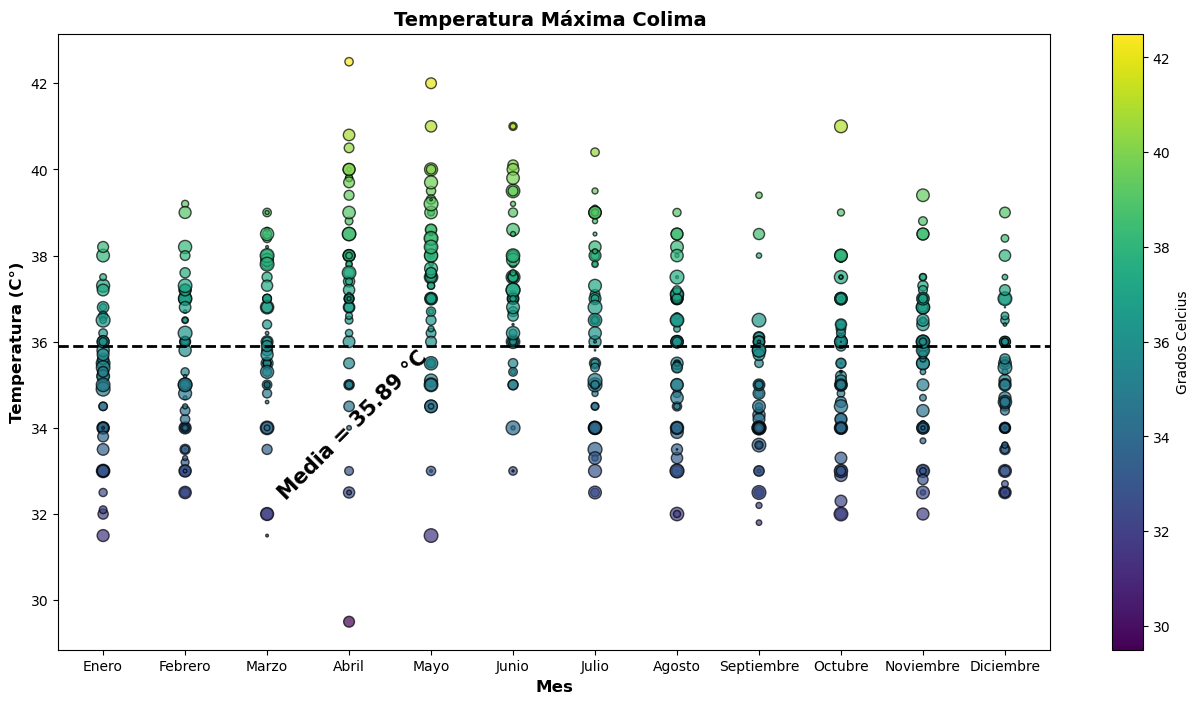

In [7]:
x = temperatura_maxima_por_año_mes['Mes']

y= temperatura_maxima_por_año_mes['Temperatura Maxima']

# Normalizar los valores de magnitud en el rango [0, 1]
norm = Normalize(vmin=min(y), vmax=max(y))
normalized_y = norm(y)

# Crear el gráfico de dispersión con colores normalizados
plt.figure(figsize=(16, 8))
scatter = plt.scatter(x, y, c=normalized_y, s=100 * np.random.rand(len(y)), alpha=0.7, cmap='viridis', edgecolors='black')

# Añadir título y etiquetas de los ejes
plt.title("Temperatura Máxima Colima ", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Mes", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Temperatura (C°)", fontsize=12, fontweight='bold', color='k')


# Calcula la media de todos los datos
media_temperatura = temperatura_maxima_por_año_mes['Temperatura Maxima'].mean()

# Dibuja una línea horizontal para representar la media
plt.axhline(y=media_temperatura, color='k', linestyle='--', label=f'Media: {media_temperatura:.2f}', linewidth=2)
# Etiqueta la línea de la media con el valor
plt.text(orden_meses[-8], media_temperatura, f'Media = {media_temperatura:.2f} °C', ha='right', va='top', fontsize=15, fontweight='bold', color='k', rotation = 45)

# Crear un objeto ScalarMappable para crear la barra de colores
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Necesario para la barra de colores

# Crear ejes para la barra de colores
cbar_axes = plt.colorbar(sm, label='Grados Celcius', ax=plt.gca())

# Mostrar el gráfico
plt.show()

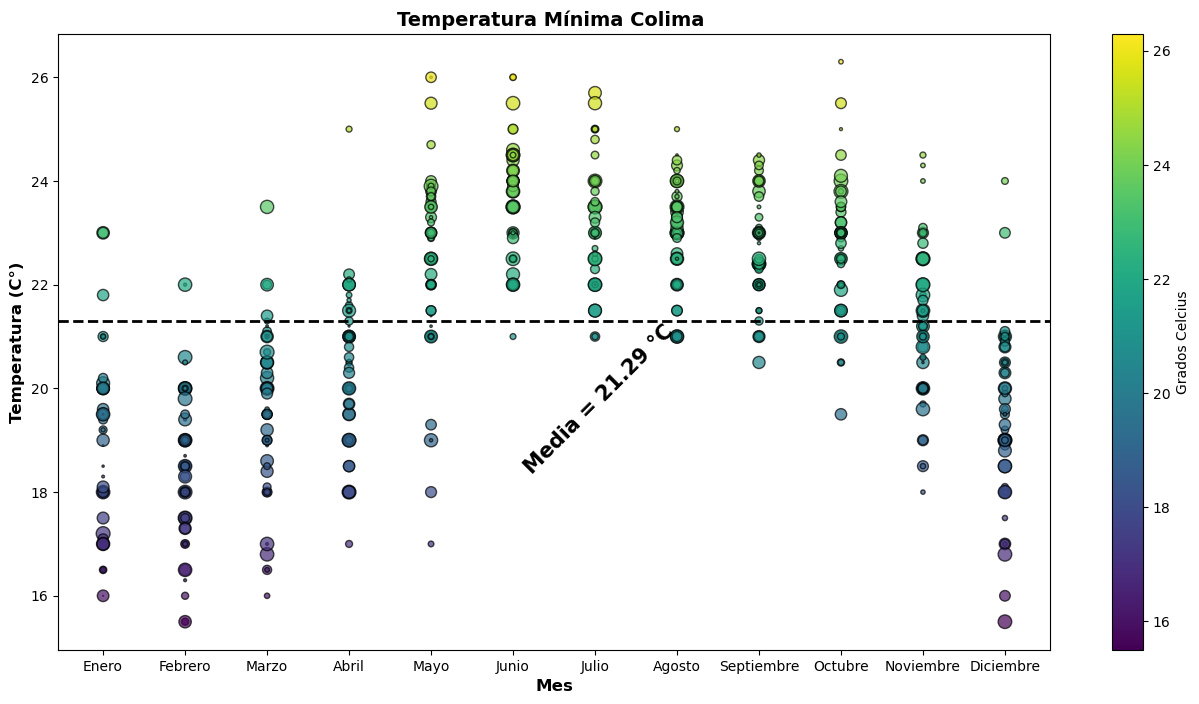

In [8]:
x = temperatura_minima_por_año_mes['Mes']

y= temperatura_minima_por_año_mes['Temperatura Minima']

# Normalizar los valores de magnitud en el rango [0, 1]
norm = Normalize(vmin=min(y), vmax=max(y))
normalized_y = norm(y)

# Crear el gráfico de dispersión con colores normalizados
plt.figure(figsize=(16, 8))
scatter = plt.scatter(x, y, c=normalized_y, s=100 * np.random.rand(len(y)), alpha=0.7, cmap='viridis', edgecolors='black')

# Añadir título y etiquetas de los ejes
plt.title("Temperatura Mínima Colima ", fontsize=14, fontweight='bold', color='k')
plt.xlabel("Mes", fontsize=12, fontweight='bold', color='k')
plt.ylabel("Temperatura (C°)", fontsize=12, fontweight='bold', color='k')


# Calcula la media de todos los datos
media_temperatura = temperatura_minima_por_año_mes['Temperatura Minima'].mean()


# Dibuja una línea horizontal para representar la media
plt.axhline(y=media_temperatura, color='k', linestyle='--', label=f'Media: {media_temperatura:.2f}', linewidth=2)
# Etiqueta la línea de la media con el valor
plt.text(orden_meses[-5], media_temperatura, f'Media = {media_temperatura:.2f} °C', ha='right', va='top', fontsize=15, fontweight='bold', color='k', rotation = 45)

# Crear un objeto ScalarMappable para crear la barra de colores
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Necesario para la barra de colores

# Crear ejes para la barra de colores
cbar_axes = plt.colorbar(sm, label='Grados Celcius', ax=plt.gca())

# Mostrar el gráfico
plt.show()

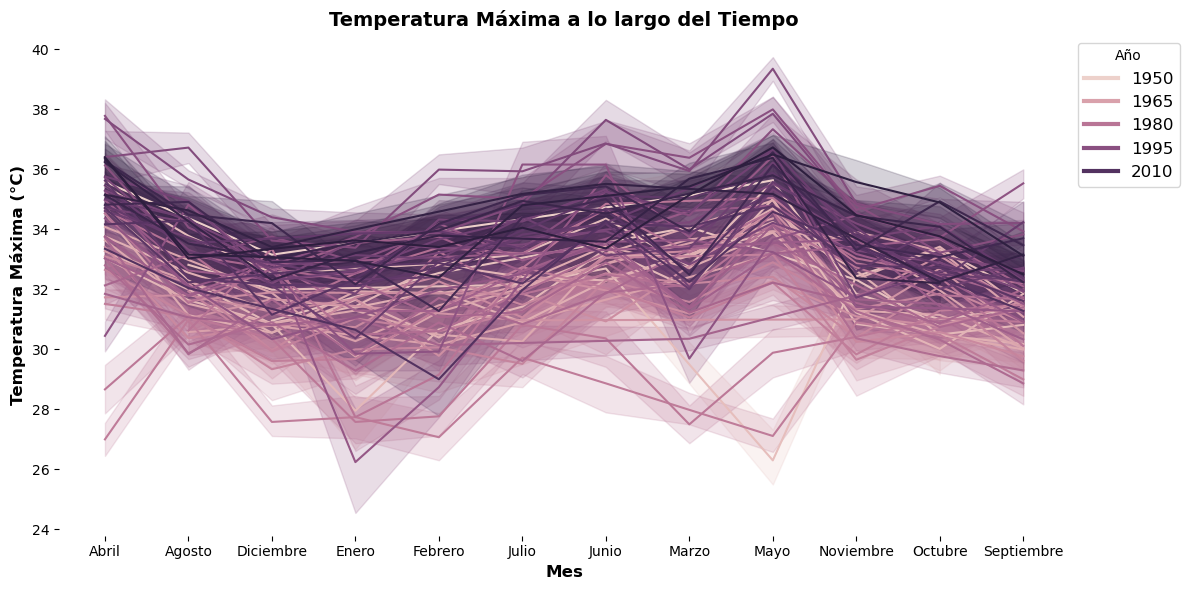

In [12]:
# Crea la gráfica de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Temperatura Maxima', hue='Año', data=datos)

# Añade etiquetas y título
plt.title('Temperatura Máxima a lo largo del Tiempo', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Mes', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Temperatura Máxima (°C)', fontsize=12, fontweight='bold', color='k')

# Muestra la leyenda fuera del gráfico
leyenda = plt.legend(title='Año', bbox_to_anchor=(1, 1), loc='upper left', fontsize='large')

# Engrosar las líneas de la leyenda
for line in leyenda.get_lines():
    line.set_linewidth(3)

# Configurar el fondo a blanco
plt.gca().set_facecolor('white')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)


# Muestra la gráfica
plt.tight_layout()
# Exportar la gráfica a un archivo SVG
plt.savefig('grafica_temperatura.svg', format='svg', bbox_inches='tight')

plt.show()

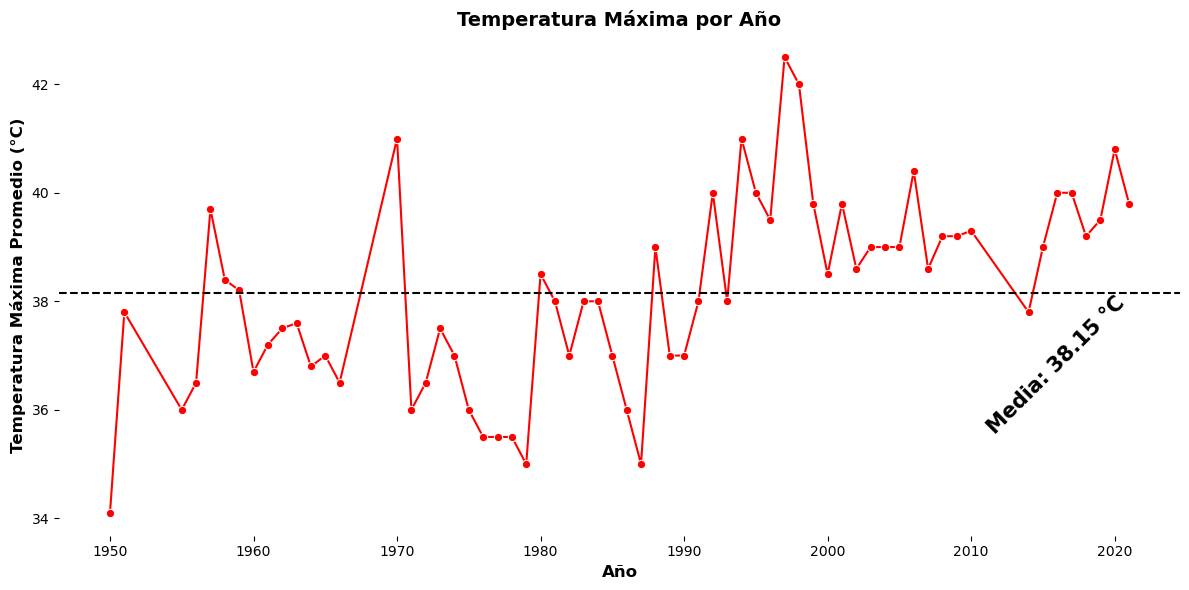

In [13]:
# Agrupa los datos por año y calcula la temperatura máxima para cada año
datos_por_año = datos.groupby('Año')['Temperatura Maxima'].max().reset_index()

# Crea la gráfica de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Temperatura Maxima', data=datos_por_año, color='red', marker='o')

# Calcula la media general de la temperatura máxima
media_temperatura = datos_por_año['Temperatura Maxima'].mean()

# Agrega el texto con la temperatura media sobre la línea
plt.text(datos_por_año['Año'].max(), media_temperatura, f'Media: {media_temperatura:.2f} °C', ha='right', va='top', fontsize=15, fontweight='bold', color='k', rotation=45)

# Añade etiquetas y título
plt.title('Temperatura Máxima por Año', fontsize=14, fontweight='bold', color='k')
plt.xlabel('Año', fontsize=12, fontweight='bold', color='k')
plt.ylabel('Temperatura Máxima Promedio (°C)', fontsize=12, fontweight='bold', color='k')

# Agrega una línea horizontal para representar la media
plt.axhline(y=media_temperatura, color='k', linestyle='--', label='Media')

# Configurar el fondo a blanco
plt.gca().set_facecolor('white')

# Eliminar las líneas de los ejes X e Y
sns.despine(left=True, right=True, top=True, bottom=True)

# Exportar la gráfica a un archivo SVG
plt.savefig('grafica_temperatura_anual.svg', format='svg', bbox_inches='tight')

# Muestra la gráfica
plt.tight_layout()
plt.show()
